In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
plt.rcParams['axes.grid'] = True
import scipy.io
from scipy.fft import fft, fftfreq
from scipy.stats import entropy, skew
import pandas as pd
pd.options.display.max_columns = None
import plotly.graph_objects as go 
import plotly.express as px
from plotly.subplots import make_subplots
import math 
from scipy import signal
import json
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 
import plotly.io as pio
pio.renderers
pio.renderers.default = "png"
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [2]:
train_df = pd.read_csv("data/training_set.csv")
train_df.drop(columns=train_df.columns[0], 
        axis=1, 
        inplace=True)
train_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.56,0.00,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,2.70,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.31,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,18.18,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.12,0.25,0.00,0.00,0.12,0.00,0.00,2.19,0.0,0.51,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.64,0.25,0.12,0.0,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.04,0.00,0.0,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


In [3]:
train_df.shape

(3910, 58)

## Cleaning dataset
Datast doesn't contain any empty values or infinity

In [32]:
print("Number of nans:", train_df.isna().sum().sum())
print("Number of numpy inf: ", np.isinf(train_df).sum().sum())
Y = train_df.Y.values
X = train_df.drop(["Y"], axis =1)

Number of nans: 0
Number of numpy inf:  0


## Dataset analysis

### Dataset is sparse
An initial look at the dataset suggests that it is a sparse dataset. That means each new entry in the dataset interacts with only a small number of features. It can also be safely assumed that since every new event deals with a limited number of features, it is not a time-series data and each row can be treated independently without looking into the past for the classification task. From the assignment task, it may appear that these features or columns are different risk associated with a task.

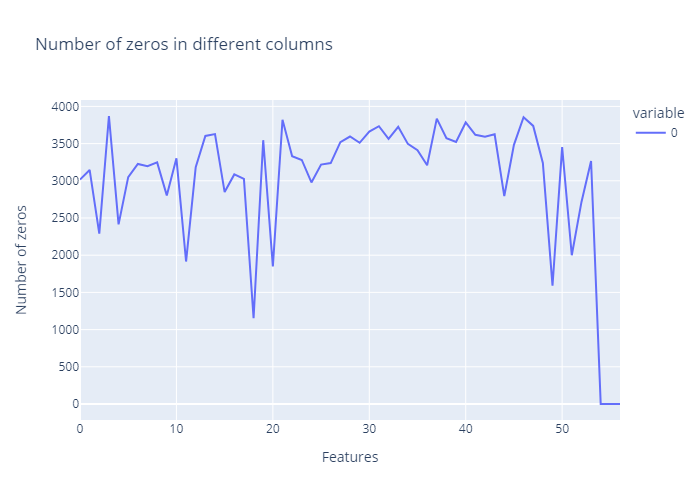

In [33]:
val_counts = X.X1.value_counts()
zero_counts = np.zeros(X.shape[1])
for idx, col in enumerate(X.columns):
    val_counts = X[col].value_counts()
    if 0 in val_counts.keys():
        zero_counts[idx] = val_counts[0]
    else:
        zero_counts[idx] = 0

# plt.plot(zero_counts)
fig = px.line(zero_counts, title = "Number of zeros in different columns")
fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Number of zeros")
fig.show()

### Dimensionality of feature set and their seperation based on the classes

#### PCA before normalization
PCA suggests that most of the information in the data is contained in three reduced dimensional feature set. It is also seen that into the projected subspace, features with maximum variance are not linearly seperable and have too much overlap in between the two classes that is 0 and 1. 


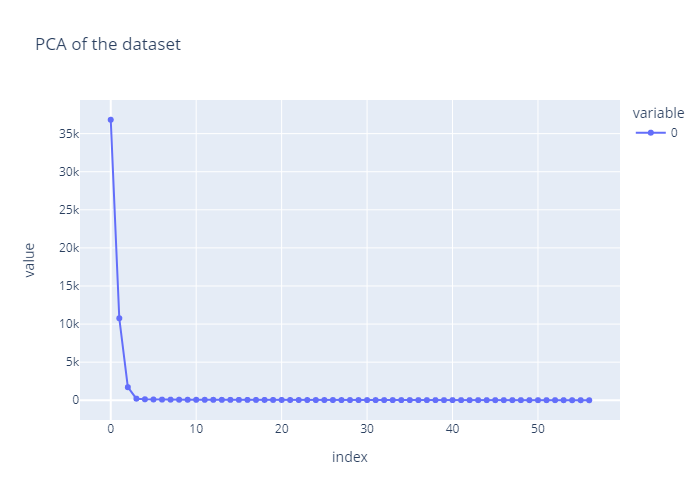

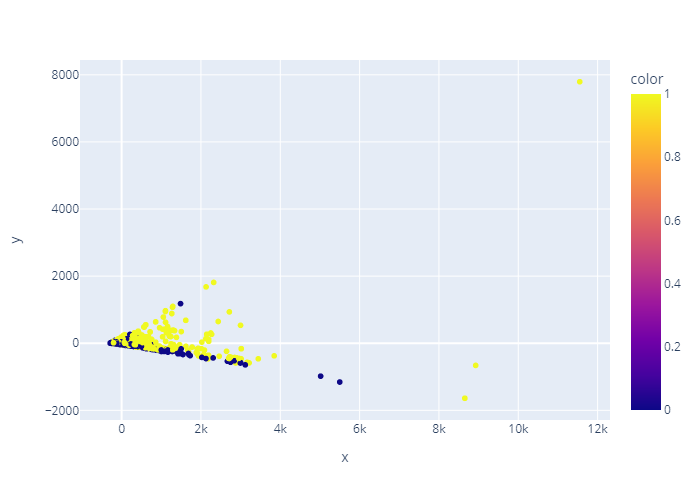

In [22]:
from sklearn.decomposition import PCA

Y = train_df.Y.values
X = train_df.drop(["Y"], axis =1)

pca = PCA()
X_reduced_pca = pca.fit_transform(X)
fig = px.line(pca.singular_values_, title = "PCA of the dataset", markers = True)
# plt.plot(pca.singular_values_)
fig.show()
fig = px.scatter(x = X_reduced_pca[:,0], y = X_reduced_pca[:,1], color = Y)


fig.show()


## Normalization and train-validation split
It can be seen that after normalization of the data, the reduced feature set are much better seperated in between the two classes in PCA. It is because originally PCA was dominated by the direction having most variance but that effect reduced upon normalization. It can be seen that we still have three dominant features in the projected subspace just like what we had before normalization and it makes sense because the normalization process is linear in nature. 



In [52]:
from sklearn.model_selection import train_test_split
train_df_norm = (train_df-train_df.mean())/train_df.std()
train_df_norm.head()
Y = train_df.Y.values
X = train_df.drop(["Y"], axis =1)

X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size=0.30)
X_train = (X_train-X_train.mean())/X_train.std()
X_test = (X_test-X_test.mean())/X_test.std()
print("Distribution of classes: ", np.bincount(Y))

Distribution of classes:  [2376 1534]


#### LDA
With LDA, we see that a projection into a subspace is possible where the two classes are seperated with one class being centered around a mean of 2 and the other one around a mean of -2

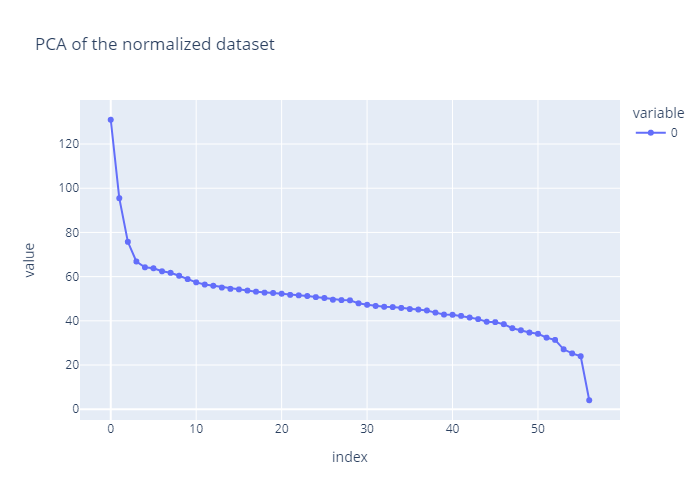

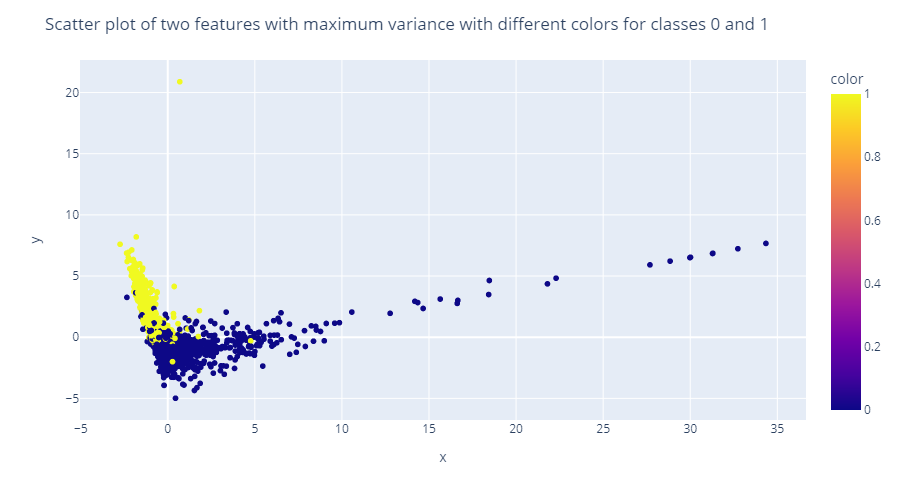

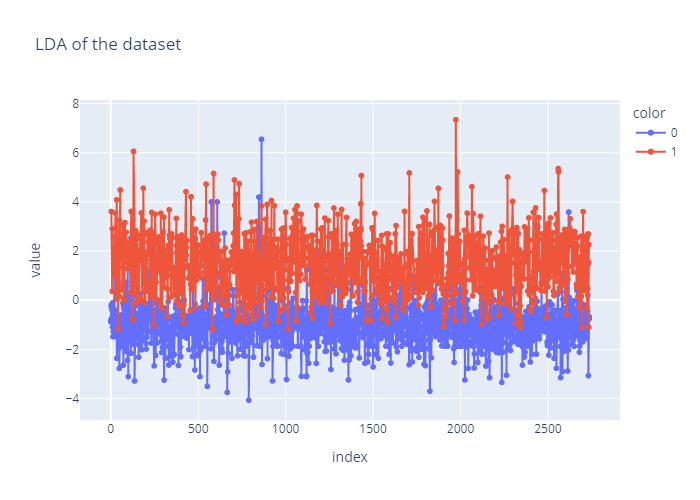

Accuracy of LDA on the test dataset is:  0.8815004262574595


In [56]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_train)
# fig = make_subplots(rows=1, cols=2, subplot_titles = ["PCA of the dataset", "Scatter plot of two most dominant features in the feature set projected onto PCA subspace"])
# fig.add_trace(go.Scatter(x = np.arange(len(pca.singular_values_)), y= pca.singular_values_, mode='lines+markers'), row = 1, col = 1)
fig = px.line(pca.singular_values_, title = "PCA of the normalized dataset", markers = True)
fig.show()
pca = PCA(n_components=3)
X_reduced_pca = pca.fit_transform(X_train)

# fig = go.Figure(data=[go.Scatter3d(x = X_reduced_pca[:,0], y= X_reduced_pca[:,1], z = X_reduced_pca[:,2],  mode='markers', marker=dict(
#                 color=Y))])
fig = px.scatter(x = X_reduced_pca[:,0], y = X_reduced_pca[:,1], color = y_train)

fig.update_layout(
    title_text="Scatter plot of two features with maximum variance with different colors for classes 0 and 1",autosize=False,
    width=900,
    height=500,)
fig.show()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
X_projected_lda  = clf.transform(X_train)
fig = px.line(X_projected_lda, title = "LDA of the dataset", markers = True, color = y_train)
fig.show()
print("Accuracy of LDA on the test dataset is: ", clf.score(X_test, y_test))

## Entropy per class

### Entropy per class per feature
Lower entropy means higer information gain from the feature. It can also be seen that there are several pure features in the dataset and a feature reduction using decision tree might be difficult

In [39]:
def get_entropy(data):
    bin_count = np.bincount(data)
    return(entropy(bin_count))

def get_entropy_dataframe(data):
    df_entropy = pd.DataFrame([], columns = data.columns)
    entropy_list = np.array([])
    for col in data.columns:
        bin_count = np.bincount(data[col])
        entropy_list = np.append(entropy_list, entropy(bin_count))
    
    df_entropy = pd.DataFrame([entropy_list], columns = data.columns)
    return df_entropy

entropy_per_class = train_df_norm.groupby(['Y']).apply(get_entropy_dataframe).reset_index(level=1, drop=True).drop(columns=['Y']).reset_index()
entropy_per_class


,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,-0.803404,0.296268,0.144821,0.419020,0.000000,0.288463,0.224477,0.045876,0.132950,0.201513,0.325599,0.145679,0.555347,0.290512,0.149481,0.059380,0.107982,0.149341,0.261091,0.449147,0.024676,0.295957,0.041159,0.032141,0.052023,0.558998,0.566863,0.332654,0.461255,0.330123,0.473086,0.358826,0.318104,0.352528,0.318010,0.407169,0.464496,0.592709,0.084864,0.409661,0.309973,0.237124,0.359687,0.429196,0.253904,0.428012,0.397604,0.103081,0.225300,0.190676,0.451783,0.341869,0.087734,0.057905,0.052718,0.007384,0.010493,0.183986
1,1.244386,0.620226,0.069252,0.603311,0.062465,0.679605,0.764843,0.731101,0.597009,0.761370,0.522337,0.723998,0.347243,0.536873,0.357559,0.482895,0.623377,0.698084,0.676768,0.646364,0.472669,0.785889,0.219749,0.821225,0.522245,0.009963,0.025588,0.000000,0.035878,0.000000,0.028981,0.010867,0.009963,0.042221,0.015396,0.015396,0.118711,0.149087,0.068430,0.064248,0.187885,0.000000,0.000000,0.035546,0.021918,0.040008,0.023549,0.029544,0.005434,0.126673,0.171167,0.124702,0.445375,0.604941,0.151607,0.163863,0.444242,0.658630


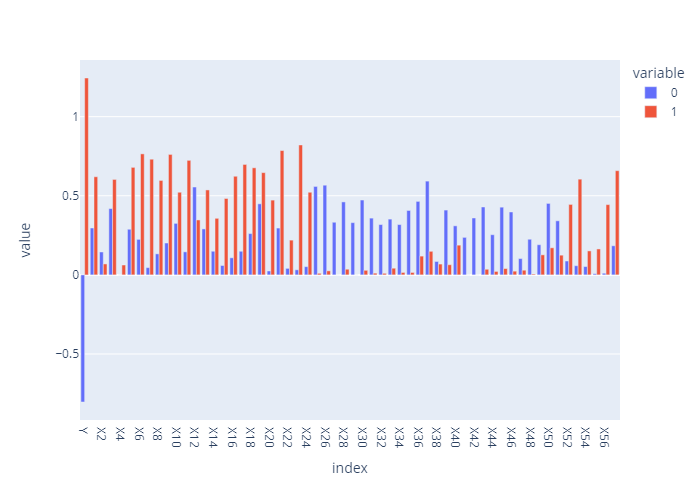

In [40]:
entropy_per_class_transposed = entropy_per_class.T
fig = px.bar(entropy_per_class_transposed,  barmode="group" )
fig.show()

## Feature importance

### Feature importance as coefficients of linear regression
From the score on the test dataset, it can be seen that this is not a linear model.

Score using a linear model 0.21316172977892067


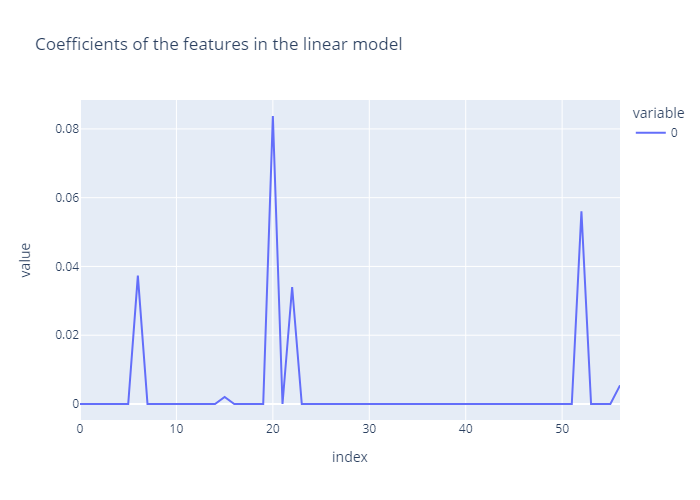

In [68]:
from sklearn.linear_model import Lasso


reg = Lasso(alpha = 0.1)
X = train_df.drop(["Y"], axis = 1).values
Y = train_df["Y"].values
reg.fit(X_train,y_train)
print("Score using a linear model", reg.score(X_test,y_test))
fig = px.line(reg.coef_ , title = 'Coefficients of the features in the linear model')
fig.show()

### Decision Trees
A straightforward application of decision tree reveals that no feature on its own is important enough to be considered for an accurate classification between the two classes. However, this was also clear given the number of pure features per class in the dataset

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
print("Classification scores for different train validation split", cross_val_score(clf, X_train, y_train, cv=5))
clf.fit(X_train,y_train)
print("Classification score using a decision tree with 5 fold cross validation", clf.score(X_test, y_test))

Classification scores for different train validation split [0.91788321 0.90145985 0.91224863 0.89945155 0.8738574 ]
Classification score using a decision tree with 5 fold cross validation 0.6069906223358909


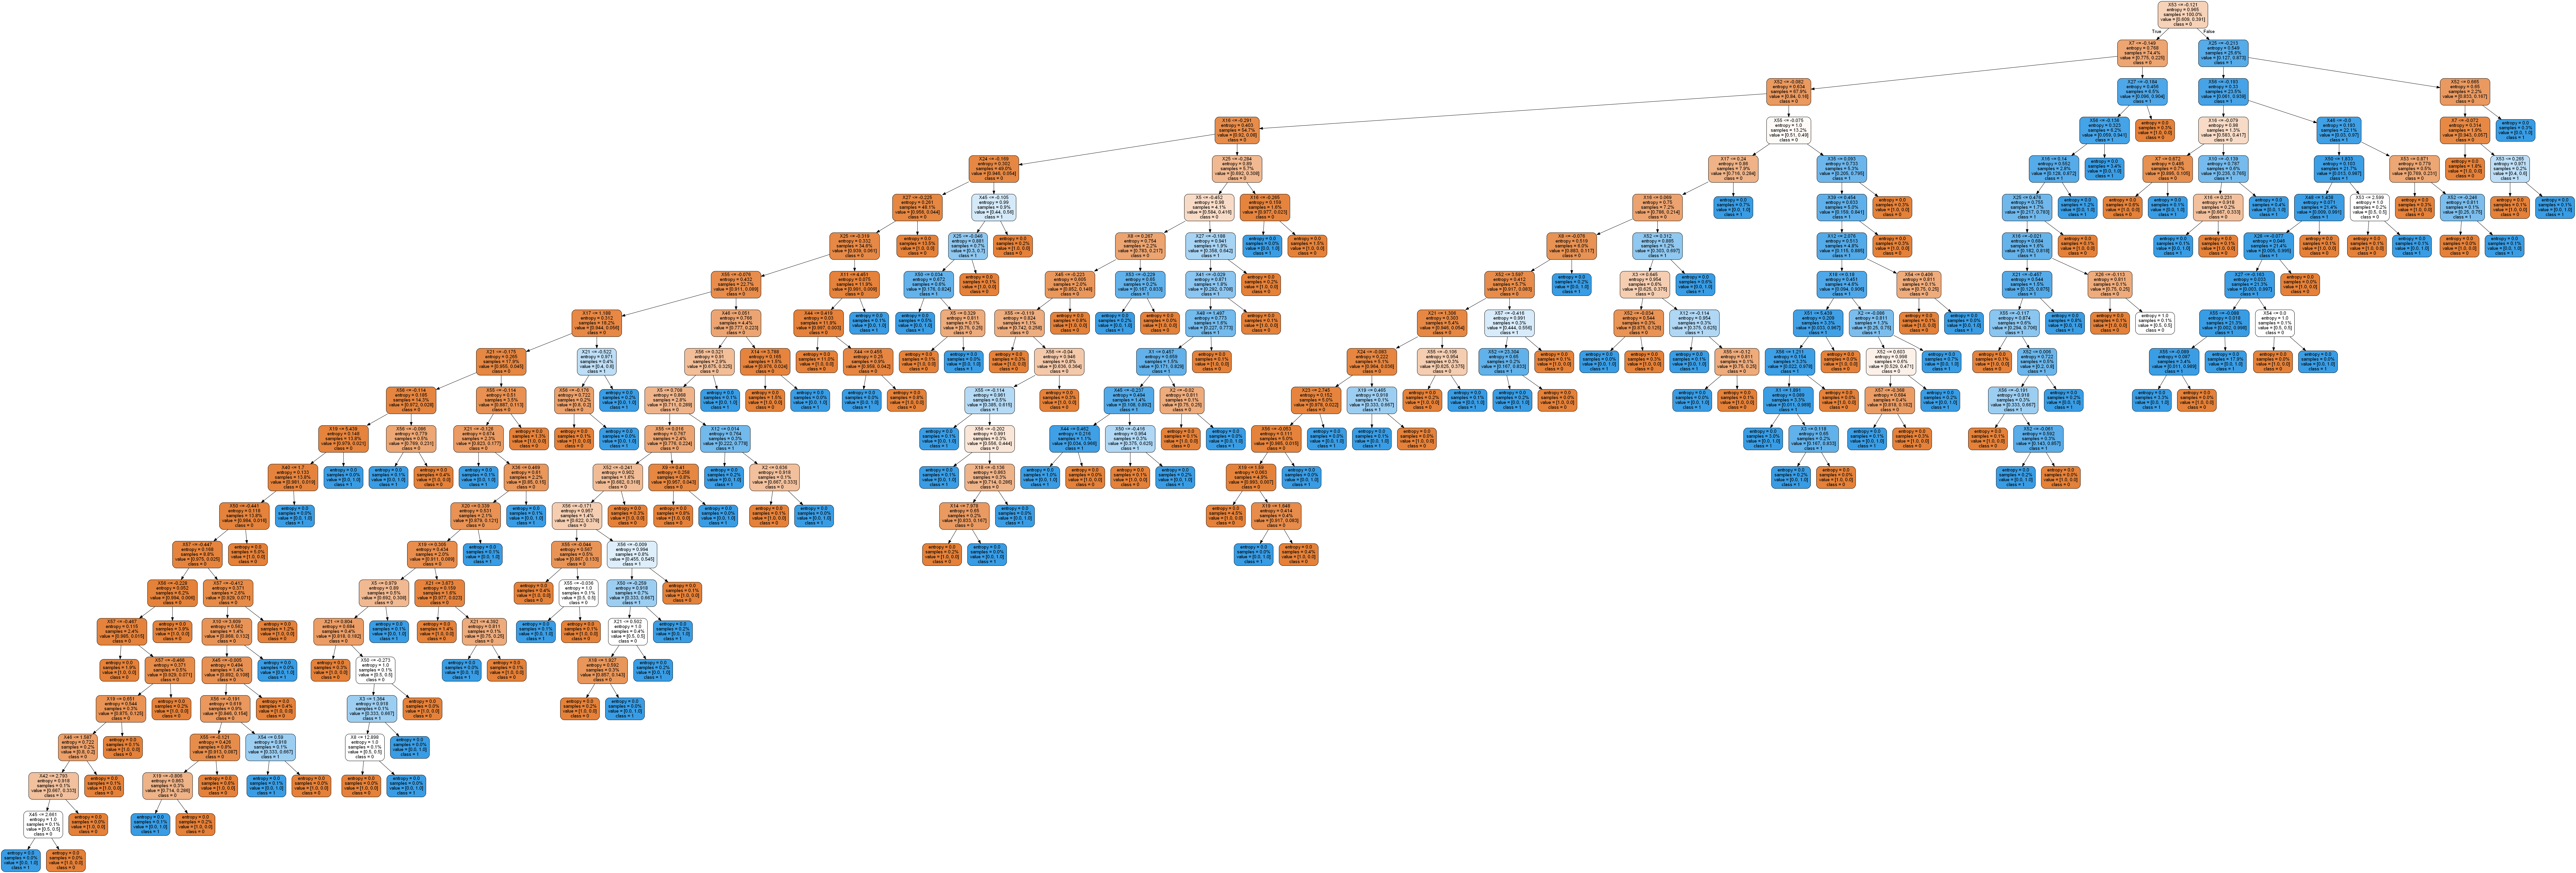

In [43]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

treeDot = StringIO() 
# Export as dot file
export_graphviz(clf, out_file=treeDot, 
                feature_names = train_df.columns[:-1],
                class_names = ['0', '1'],
                rounded = True, proportion = True, 
                filled = True)

graph2 = pydot.graph_from_dot_data(treeDot.getvalue())  
Image(graph2[0].create_png()) 



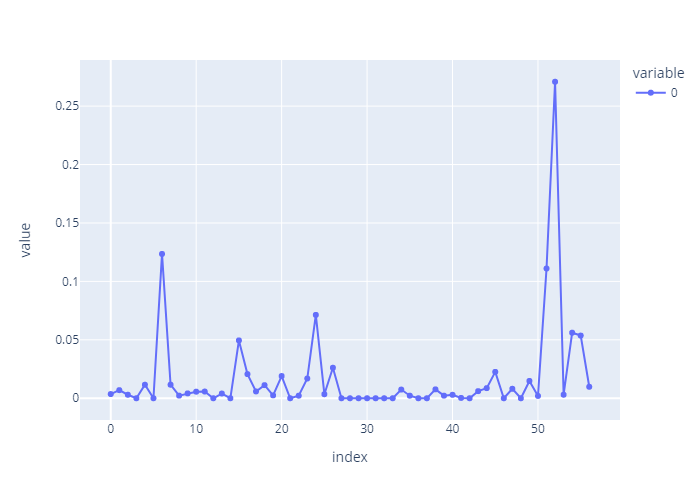

In [44]:
fig = px.line(clf.feature_importances_, markers = True)
fig.show()

## Classification

In [45]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

def grid_search_fun(clf, parameters, scorer, X_train, y_train, X_test, y_test):
    estimators = GridSearchCV(clf, parameters, scoring = scorers[scorer], cv =5)
    estimators.fit(X_train,y_train )
    clf_best = estimators.best_estimator_
    y_pred = clf_best.predict(X_test)
    y_scores = clf_best.predict_proba(X_test)[:, 1]
    print("Classification score for the classifier: ", clf_best.score(X_test, y_test))
    print("Confusion Matrix: ")
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['0', '1'], index=['0', '1']))
    
    fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
    fig = px.line(x = fpr, y = tpr, title="ROC Curve")
    fig.update_layout(
    xaxis_title="True Positive",
    yaxis_title="False positive")
    fig.show()
    
    return estimators

#### Logistic Regression
Since the dataset lies in a linearly separable subspace as seen from PCA and LDA, it is expected that logistic regression will yield good classification score as seen below. Looking at the coefficients, the logistic regression seems to be using all the features that are available. What would be interesting is to apply dimensionality reduction first and check if logistic regression retains its performance.

Classification score for the classifier:  0.9249786871270247
Confusion Matrix: 
     0    1
0  665   36
1   52  420


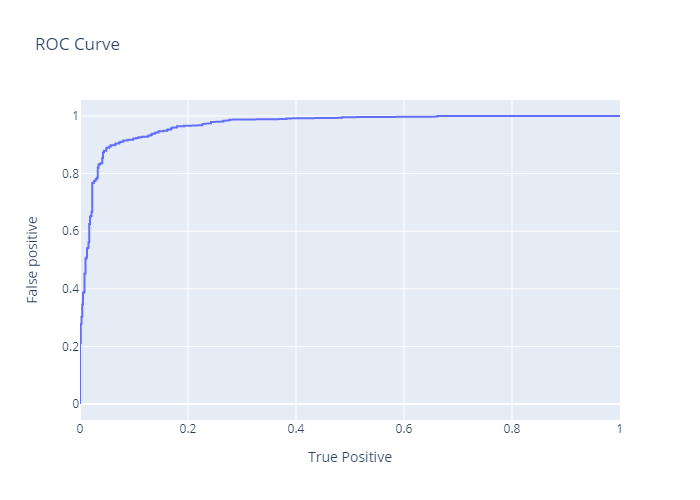

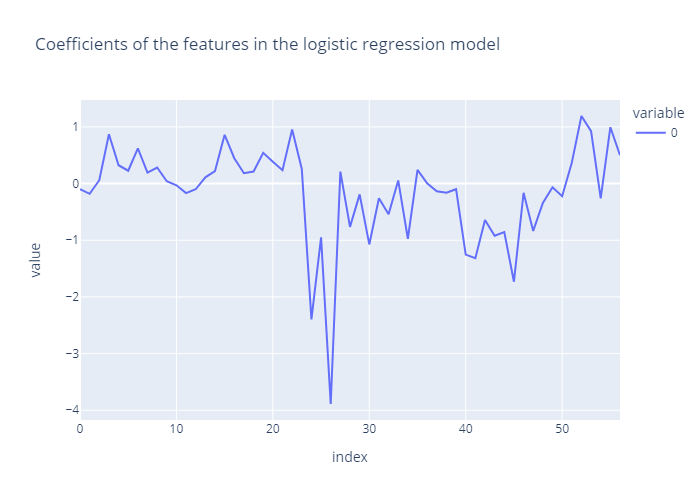

In [69]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
parameters = {'C': [0.1, 0.5, 1]}

estimators_logistic = grid_search_fun(clf, parameters, 'accuracy_score', X_train, y_train, X_test, y_test)
clf = estimators_logistic.best_estimator_
fig = px.line(clf.coef_[0] , title = 'Coefficients of the features in the logistic regression model')
fig.show()

### Gaussian Naive Bayes
Although, data is linearly seperable, it is not clear whether data follows a gaussian distributed classes. Therefore performance is not as good as logistic regression

Classification score for the classifier:  0.8312020460358056
Confusion Matrix: 
     0    1
0  546  163
1   35  429


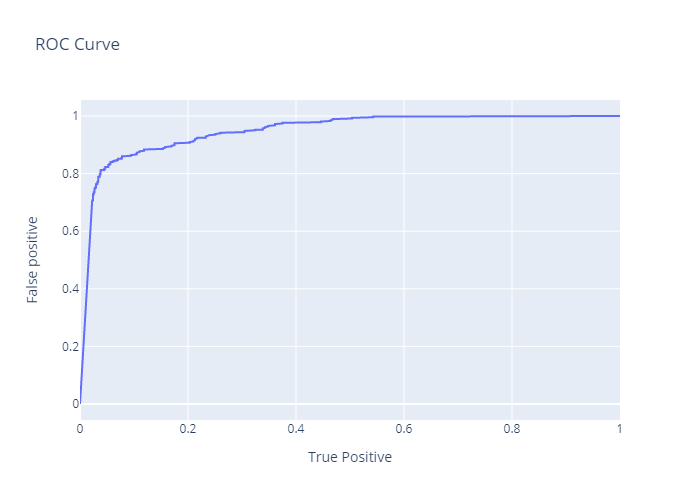

In [47]:
from sklearn.naive_bayes import GaussianNB
parameters = {'var_smoothing':[1e-9, 1e-6]}
clf_nb = GaussianNB()
estimators = grid_search_fun(clf_nb, parameters, 'accuracy_score', X_train, y_train, X_test, y_test)
clf_nb = estimators.best_estimator_

### Decision Tree classifier
We use a decision tree classifier below to understand how important features are in the dataset. It is seen that best performance is achieved when 20 features are used for the classification. However, performance is not as good as decision classifier. A random forest may perform better on this dataset given that each feature has unique property which can be better understood by an ensamble learners rather than a single learner

Classification score for the classifier:  0.875532821824382
Confusion Matrix: 
     0    1
0  662   47
1   99  365


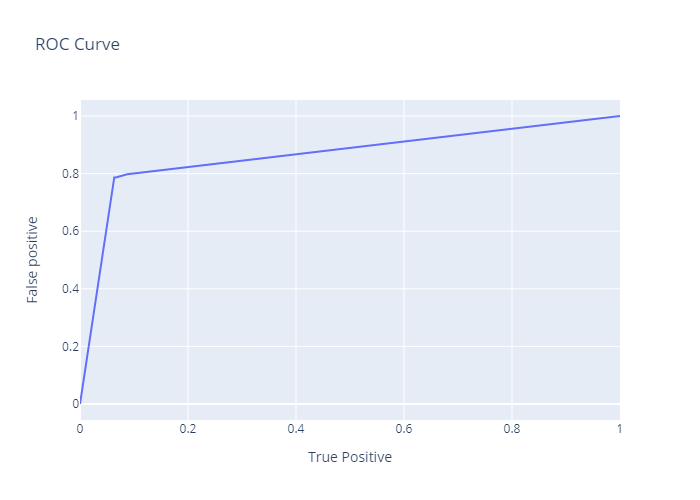

In [48]:
parameters = {'min_samples_split': [3, 5, 10, 15, 20, 30], 
    'max_depth': [3, 5, 10, 15, 25],
    'max_features': [3, 5, 15, 20, 30, 50],
    'class_weight': ["balanced", None]}


clf = DecisionTreeClassifier(random_state=0, criterion='entropy')
estimators = grid_search_fun(clf, parameters, 'accuracy_score', X_train, y_train, X_test, y_test)
clf = estimators.best_estimator_
# estimators.fit(X_train,y_train )


In [50]:
estimators.best_params_

{'class_weight': 'balanced',
 'max_depth': 15,
 'max_features': 30,
 'min_samples_split': 5}

In [20]:
# test_df = pd.read_csv("data/test_set.csv")

# test_df.drop(columns=test_df.columns[0], 
#         axis=1, 
#         inplace=True)
# test_df_norm = (test_df-test_df.mean())/test_df.std()
# X_test = test_df_norm.values